In [58]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Titanic Survival Analysis Report Dataset

This notebook performs an exploratory analysis of the Titanic dataset to understand the key factors that influenced passenger survival.


## 📂 Dataset Summary
The dataset includes passenger information such as 
`Age`, 
`Gender`, 
`Pclass`, 
`Fare`, 
`Embarked`,
`Survival Label` (Target)


In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
path = "/portfolio/titanic/data/processed.csv"
savg_path = "/portfolio/titanic/outputs/"
df = pd.read_csv(path)

read a csv file

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,FamilySize,HasCabin,FamilyGroup,AgeGroup,FareBin
0,1,0,3rd class,Owen Harris Braund,Male,22.0,1,0,A/5 21171,7.25,Southampton,Dead,2,0,Small Family,Teen,Low
1,2,1,1st class,John Bradley Cumings,Female,38.0,1,0,PC 17599,71.28,Cherbourg,Alive,2,1,Small Family,Adult,Medium
2,3,1,3rd class,Laina Heikkinen,Female,26.0,0,0,STON/O2. 3101282,7.92,Southampton,Alive,1,0,Alone,Adult,Low
3,4,1,1st class,Jacques Heath Futrelle,Female,35.0,1,0,113803,53.10,Southampton,Alive,2,1,Small Family,Adult,Medium
4,5,0,3rd class,William Henry Allen,Male,35.0,0,0,373450,8.05,Southampton,Dead,1,0,Alone,Adult,Low


In [62]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Status         0
FamilySize     0
HasCabin       0
FamilyGroup    0
AgeGroup       0
FareBin        0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Status       1309 non-null   object 
 12  FamilySize   1309 non-null   int64  
 13  HasCabin     1309 non-null   int64  
 14  FamilyGroup  1309 non-null   object 
 15  AgeGroup     1309 non-null   object 
 16  FareBin      1309 non-null   object 
dtypes: float64(2), int64(6), object(9)
memory usage: 174.0+ KB


In [64]:
df[df['FareBin'] == 'Free']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,FamilySize,HasCabin,FamilyGroup,AgeGroup,FareBin
179,180,0,3rd class,Lionel Leonard,Male,36.0,0,0,LINE,0.0,Southampton,Dead,1,0,Alone,Adult,Free
263,264,0,1st class,William Harrison,Male,40.0,0,0,112059,0.0,Southampton,Dead,1,1,Alone,Adult,Free
271,272,1,3rd class,William Henry Tornquist,Male,25.0,0,0,LINE,0.0,Southampton,Alive,1,0,Alone,Adult,Free
277,278,0,2nd class,Francis Parkes,Male,30.6,0,0,239853,0.0,Southampton,Dead,1,0,Alone,Adult,Free
302,303,0,3rd class,William Cahoone Jr Johnson,Male,19.0,0,0,LINE,0.0,Southampton,Dead,1,0,Alone,Teen,Free
413,414,0,2nd class,Alfred Fleming Cunningham,Male,30.6,0,0,239853,0.0,Southampton,Dead,1,0,Alone,Adult,Free
466,467,0,2nd class,William Campbell,Male,30.6,0,0,239853,0.0,Southampton,Dead,1,0,Alone,Adult,Free
481,482,0,2nd class,Anthony Wood Frost,Male,30.6,0,0,239854,0.0,Southampton,Dead,1,0,Alone,Adult,Free
597,598,0,3rd class,Alfred Johnson,Male,49.0,0,0,LINE,0.0,Southampton,Dead,1,0,Alone,Senior,Free
633,634,0,1st class,William Henry Marsh Parr,Male,30.6,0,0,112052,0.0,Southampton,Dead,1,0,Alone,Adult,Free


this table shown that passengers whos don't pay a fare
These records may belong to ship workers who traveled alone!!

**get some statistics about data**

In [65]:
round(df.describe(),1)

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,HasCabin
count,1309.0,1309.0,1309.0,1309.0,1309.0,1308.0,1309.0,1309.0
mean,655.0,0.4,29.9,0.5,0.4,33.3,1.9,0.2
std,378.0,0.5,12.9,1.0,0.9,51.8,1.6,0.4
min,1.0,0.0,0.2,0.0,0.0,0.0,1.0,0.0
25%,328.0,0.0,22.0,0.0,0.0,7.9,1.0,0.0
50%,655.0,0.0,30.0,0.0,0.0,14.4,1.0,0.0
75%,982.0,1.0,35.0,1.0,0.0,31.3,2.0,0.0
max,1309.0,1.0,80.0,8.0,9.0,512.3,11.0,1.0


## 🎯 Objectives
- Explore and analyze the main features of the dataset.
- Understand relationships between features and survival.
- Handle missing values and clean the dataset.
## 🧭 Workflow
- Load and inspect the dataset  
- Analyze key features
- Handle missing values  
- Perform visual and statistical analysis

### Pssenger Analysis

Total Passengers

In [66]:
pass_count = len(df['PassengerId'])
pass_count

1309

Passenger count by Sex 

In [67]:
sex_count = df['Sex'].value_counts().reset_index()
sex_count

,Sex,count
0,Male,843
1,Female,466


Passenger count by Pclass 

In [68]:
class_count = df["Pclass"].value_counts().sort_index().reset_index()
class_count

,Pclass,count
0,1st class,323
1,2nd class,277
2,3rd class,709


Passenger count by Embarked

In [69]:
embarked_count = df["Embarked"].value_counts().reset_index()
embarked_count

,Embarked,count
0,Southampton,916
1,Cherbourg,270
2,Queenstown,123


Passenger count by AgeGroup

In [70]:
age_count = df['AgeGroup'].value_counts().reset_index()
age_count

,AgeGroup,count
0,Adult,674
1,Teen,293
2,Senior,227
3,Child,115


Passenger count by FamilyGroup

In [71]:
family_count = df['FamilyGroup'].value_counts().reset_index()
family_count

,FamilyGroup,count
0,Alone,790
1,Small Family,394
2,Medium Family,65
3,Large Family,60


#### **Visulizing the outputs of Passengers**
***

**Title:** 
Total Passengers by Gender

**Description:**
this chart represent a number of passengers categorized by Male and Female 

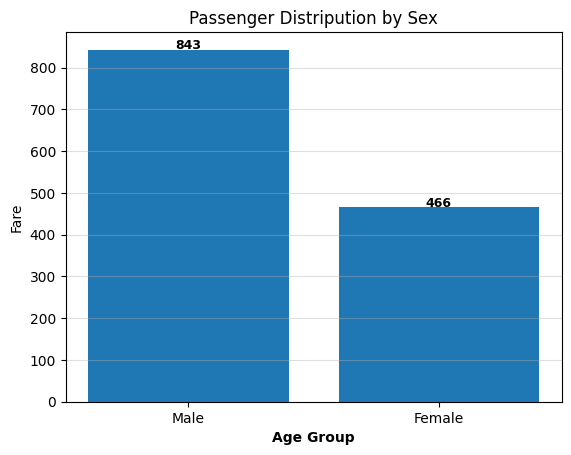

In [72]:
plt.bar(sex_count['Sex'] ,sex_count['count'])
for i, v in enumerate(sex_count['count']):
    plt.text(i, v +2, f"{v:.0f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Age Group", fontweight='bold')
plt.ylabel("Fare")
plt.title('Passenger Distripution by Sex')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_sex.png')
plt.show()

**💡Insghits :**
total male passengers is greater than female passengers

**🔎Resoning:** 
During this period , men were more likely to travel for work

**📌Recommendation:**
Optimizing ticket pricing and services for **Male passengers** with avoiding neglate a **Female passengers** requirments

---

**Title:**  Passenger Distripution by Sex

**Description:**
this chart describe the Passenger Distripution over Gender `Male` and `Female`

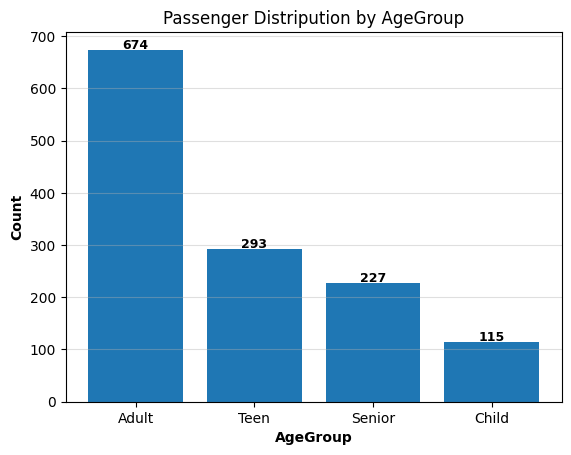

In [73]:
plt.bar(age_count['AgeGroup'] , age_count['count'])
for i, v in enumerate(age_count['count']):
    plt.text(i, v +2, f"{v:.0f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("AgeGroup", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Passenger Distripution by AgeGroup")
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_embarked.png')
plt.show()

**💡Insghits :**
Adult has a greatest count of Passengers

**🔎Resoning:** 
Adults are more likely to travel due to work, family responsibilities and financial indpendence

**📌Recommendation:**
- Allocate resources and servivecs primarily toward adult passengers 
- Ensuring accsesibality and safity for childreen and seniors

---

**Title:**
Passenger Distripution by AgeGroup

**Description:**
this chart describe a distripution of Passengers over AgeGroup

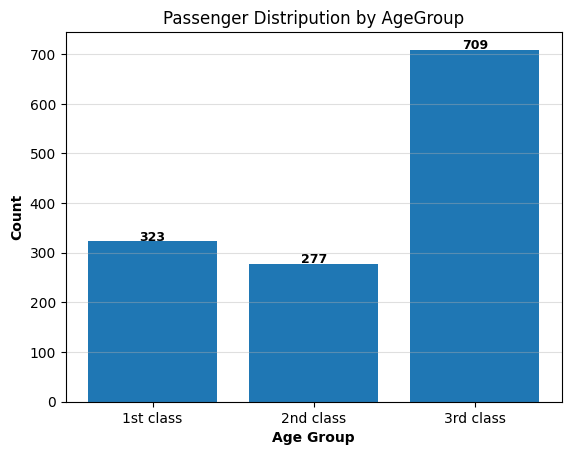

In [74]:
plt.bar(class_count['Pclass'] , class_count['count'])
for i, v in enumerate(class_count['count']):
    plt.text(i, v +2, f"{v:.0f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Age Group", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Passenger Distripution by AgeGroup")
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_age_group.png')
plt.show()

**💡Insghits :**
3rd class has a most passengers count 

**🔎Resoning:** 
- Most passengers were in `3rd Class` due to higher capacity and affordabillty 
- May be occupied for working-class passengers

**📌Recommendation:**
- Enhance ticket pricing and services for `3rd class` 
- Continous improving requirments for `2nd class` and `1st class`
- Ensure sufficent stuff to handle a larger passenger passengers
---

**Title:**
Total Passengers by Embarked

**Description:**
this chart represent the distripution of passengers over embarked

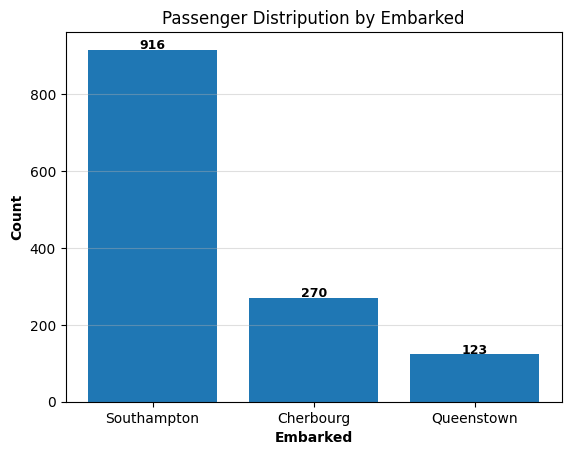

In [75]:
plt.bar(embarked_count['Embarked'] , embarked_count['count'])
for i, v in enumerate(embarked_count['count']):
    plt.text(i, v +2, f"{v:.0f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Embarked", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Passenger Distripution by Embarked")
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_embarked.png')
plt.show()

**💡Insghits:** 
Southampton has most Passengers embarked.

**🔎Resoning:**
Southampton is the main departure port.

**📌Recommendation:**
- Enhance passenger boarding managment at busy ports like southampton
- Guide passengers on boarding times and waiting to improve busieng
---

**Title:**
Passenger Distripution by FamilyGroup

**Description:**
this chart represent the distripution of passengers over FamilyGroup

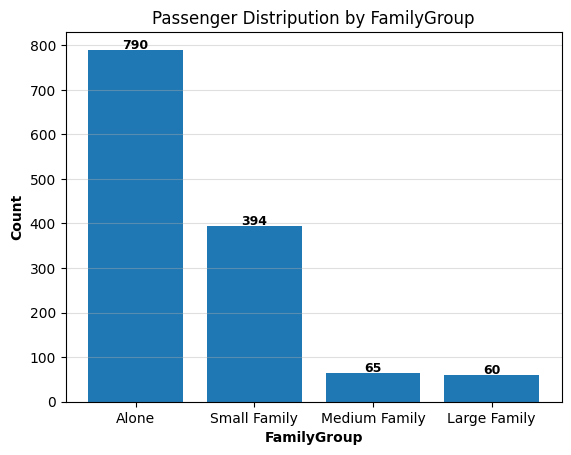

In [76]:
plt.bar(family_count['FamilyGroup'] , family_count['count'])
for i, v in enumerate(family_count['count']):
    plt.text(i, v +2, f"{v:.0f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("FamilyGroup", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Passenger Distripution by FamilyGroup")
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_family_group.png')
plt.show()

**💡insights:**
Most passengers travel alone to Due to in ship 

**🔎Reasoning:**
Most passengers in Alone and small family travelling because:
- Economic and social Factors
- Mobility and Migration
- Cabin availabillty

**📌Recommndation**
- Offer flexible ticket options 
- Improving sharing amenties
- provide special packages for solo and small family traveling

<hr style='border: 2px solid  #ffffff;'>

### Fare Section

Fare Distripution

In [77]:
fare_dist = df['FareBin'].value_counts().reset_index().sort_values(by='count')
fare_dist

,FareBin,count
4,Very High,4
3,Free,18
2,High,47
1,Medium,189
0,Low,1051


Fare Distripution by Survival Rate%

In [78]:
fare_by_survivel_rate = df.groupby('FareBin')['Survived'].mean().reset_index().sort_values(by='Survived')
fare_by_survivel_rate.round(2)

,FareBin,Survived
0,Free,0.06
2,Low,0.32
3,Medium,0.62
1,High,0.64
4,Very High,1.00


#### Visulizing the results of Fare analysis

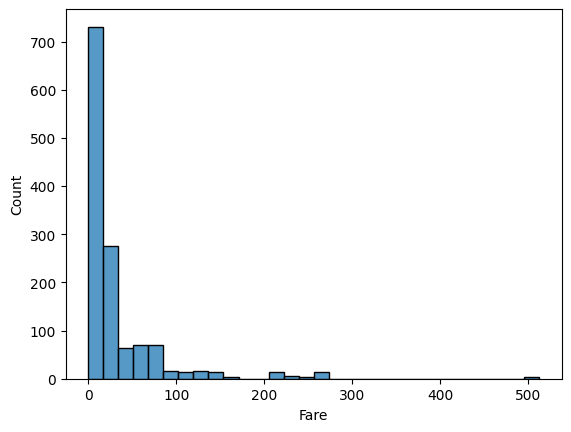

In [79]:
sns.histplot(x=df['Fare'], bins=30)
plt.show()

---

**Title:**
Survival rate analysis by Fare

**Description:**
show the relation between survival rate and fare

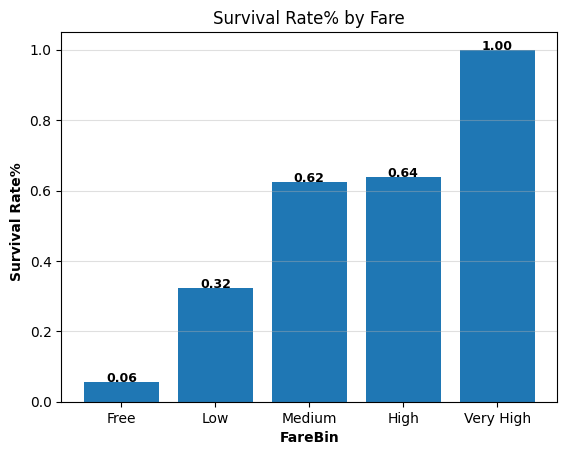

In [80]:
plt.bar(fare_by_survivel_rate['FareBin'], fare_by_survivel_rate['Survived'])
for i, v in enumerate(fare_by_survivel_rate['Survived']):
    plt.text(i, v , f"{v:.2f}", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("FareBin", fontweight='bold')
plt.ylabel("Survival Rate%  ", fontweight='bold')
plt.title("Survival Rate% by Fare")
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/passenger_distripution_by_family_group.png')
plt.show()

**💡 Insight:**
Passengers in the high fare group have the highest survival rate.

**🔎 Reasoning**

Passengers in the high fare group show a higher survival rate due to several factors:
- Better cabin safety
- Greater mobility and easier access to exits
- Lower cabin crowding and better availability of space

**📌 Recommendations**

- Offer more flexible options and safety features in other cabin classes
- Enhance comfort and safety standards for lower fare groups to reduce the survival gap

<hr style='border: 2px solid  #ffffff;'>

#### Survival Section (Core Analysis)

Survived Distripution

In [81]:
survival_dist = df['Status'].value_counts().reset_index()
survival_dist

,Status,count
0,Dead,815
1,Alive,494


Survival Rate % by Pclass 

In [82]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_pclass

,Pclass,Survived
0,1st class,0.575851
1,2nd class,0.422383
2,3rd class,0.269394


Survival Rate % by Sex

In [83]:
survival_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
survival_by_sex

,Sex,Survived
0,Female,0.82618
1,Male,0.12930


Survived Rate % by Embarked

In [84]:
survival_by_emb = df.groupby('Embarked')['Survived'].mean().reset_index()
survival_by_emb

,Embarked,Survived
0,Cherbourg,0.492593
1,Queenstown,0.439024
2,Southampton,0.335153


Survived Rate % by AgeGroup

In [85]:
survival_by_age = df.groupby('AgeGroup')['Survived'].mean().reset_index().round(2)
survival_by_age

,AgeGroup,Survived
0,Adult,0.35
1,Child,0.54
2,Senior,0.37
3,Teen,0.38


Survived Rate % by FamilyGroup

In [86]:
survival_by_family = df.groupby('FamilyGroup')['Survived'].mean().reset_index() 
survival_by_family

,FamilyGroup,Survived
0,Alone,0.292405
1,Large Family,0.216667
2,Medium Family,0.553846
3,Small Family,0.543147


 #### **Visulizing the result of Survival analysis**

**Title:**
Survival Rate by Class

**Description:**
show relation between class and survival

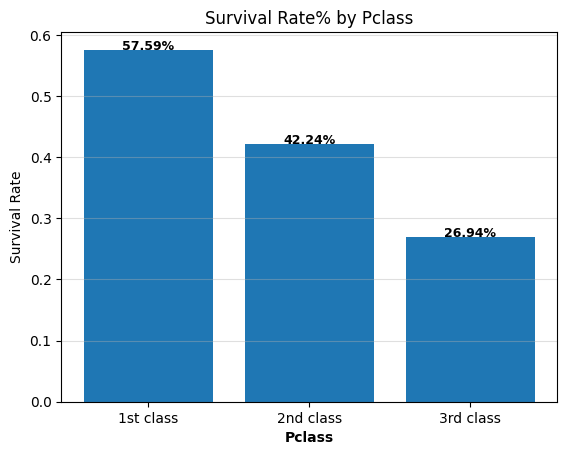

In [87]:
plt.bar(survival_by_pclass['Pclass'], survival_by_pclass['Survived'])
for i, v in enumerate(survival_by_pclass['Survived']):
    plt.text(i, v, f"{v*100:.2f}%", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Pclass", fontweight='bold')
plt.ylabel("Survival Rate")
plt.title('Survival Rate% by Pclass')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/survival_rate_by_pclass.png')

**💡 Insight:**
Survival rate increases with higher passenger class. **1st class** passengers have the highest survival rate, while **3rd class** passengers have the lowest.

**🔎 Reasoning:**

- Better cabin location and safety in higher classes
- Easier access to lifeboats
- Less crowding compared to lower classes

**📌 Recommendation:**

- Improve safety and evacuation access for lower classes
- Reduce overcrowding and enhance basic comfort across all classes

---

**Title:**
Survival Rate by Sex

**Description:**
Survival rates differ significantly by gender.

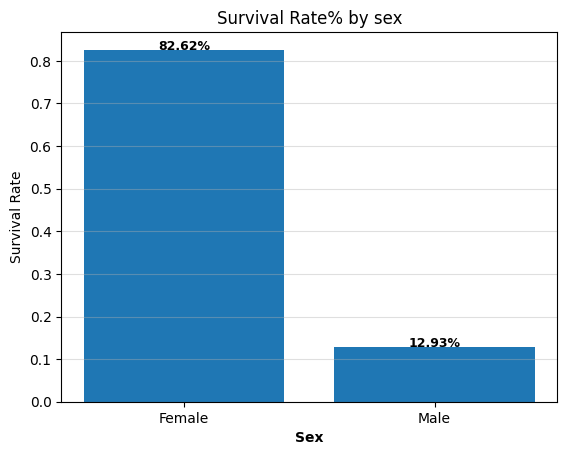

In [88]:
plt.bar(survival_by_sex['Sex'], survival_by_sex['Survived'])
for i, v in enumerate(survival_by_sex['Survived']):
    plt.text(i, v, f"{v*100:.2f}%", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Sex", fontweight='bold')
plt.ylabel("Survival Rate")
plt.title('Survival Rate% by sex')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/survival_rate_by_sex.png')

**💡 Insight:**
Female passengers had a significantly higher survival rate than males

**🔎 Reasoning:**

- **Ladies First** evacuation policy
- Higher priority during rescue operations
- Increased importance in emergency response efforts

**📌 Recommendation:**

- Ensure equal and fair evacuation procedures
- Improve safety awareness and access for all passengers

---

**Title:**
Survived Rate by Embarked

**Description:**
show the relation between the port and survived

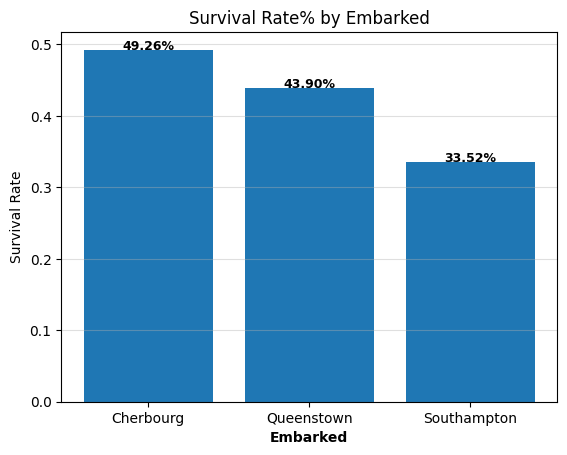

In [89]:
plt.bar(survival_by_emb['Embarked'], survival_by_emb['Survived'])
for i, v in enumerate(survival_by_emb['Survived']):
    plt.text(i, v, f"{v*100:.2f}%", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("Embarked", fontweight='bold')
plt.ylabel("Survival Rate")
plt.title('Survival Rate% by Embarked')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/survival_rate_by_embarked.png')

**💡 Insight**
Passengers who embarked from Cherbourg had a noticeably higher survival rate compared to those who embarked from Queenstown and Southampton.

**🔎 Reasoning:**

This difference may be due to:
- A higher proportion of 1st class and 2nd class passengers embarking from Cherbourg
- Better cabin locations closer to lifeboats
- Less overcrowding compared to other ports

**📌 Recommendation:**

- Apply consistent safety standards regardless of embarkation port
- Improve evacuation guidance and crew support at all boarding locations

---

**Title:**
Survived Rate by Gender

**Description:**
This chart illustrates the relationship between family group size and survival rate.

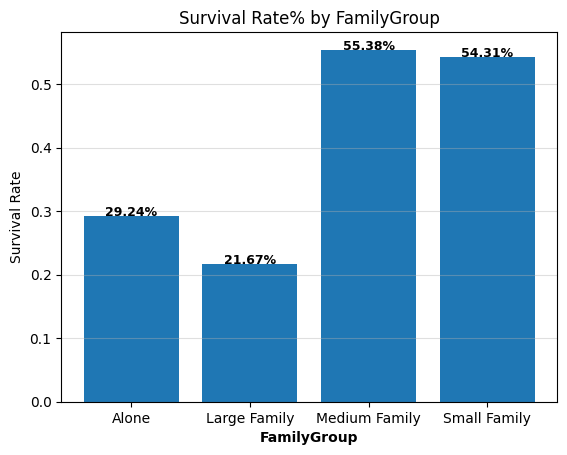

In [90]:
plt.bar(survival_by_family['FamilyGroup'], survival_by_family['Survived'])
for i, v in enumerate(survival_by_family['Survived']):
    plt.text(i, v, f"{v*100:.2f}%", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("FamilyGroup", fontweight='bold')
plt.ylabel("Survival Rate")
plt.title('Survival Rate% by FamilyGroup')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/survival_rate_by_familygroup.png')

**💡 Insight:**
Passengers traveling with small or medium-sized families had higher survival rates than those traveling alone or with large families.

**🔎 Reasoning:**

- Small and medium families could coordinate and move more efficiently during evacuation
- Large families faced mobility challenges
- Solo travelers lacked immediate support in emergency situations

**📌 Recommendation:**

- Provide extra evacuation assistance for solo travelers
- Offer guided support for large families during emergencies

--- 

**Title:**
Survival Rate by AgeGroup

**Description:**
The visualization highlights differences in survival rates among age groups.

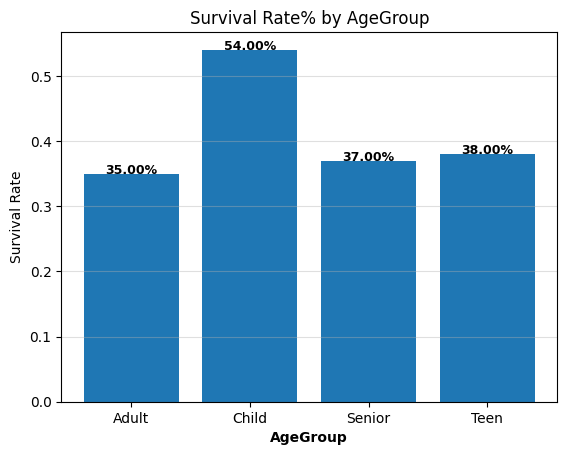

In [92]:
plt.bar(survival_by_age['AgeGroup'], survival_by_age['Survived'])
for i, v in enumerate(survival_by_age['Survived']):
    plt.text(i, v, f"{v*100:.2f}%", ha='center' , fontweight="bold" , fontsize = 9)
plt.xlabel("AgeGroup", fontweight='bold')
plt.ylabel("Survival Rate")
plt.title('Survival Rate% by AgeGroup')
plt.grid(axis = "y" , alpha=0.4)
plt.savefig(f'{savg_path}/survival_rate_by_age.png')

**💡 Insight:**
Children had the highest survival rate among all age groups, followed by teens and seniors, while adults had the lowest survival rate.

**🔎 Reasoning:**

- Children were given higher priority during evacuation
- Crew members and adults provided additional support to children
- Adults were more likely to delay evacuation to assist others

**📌 Recommendation:**

- Strengthen evacuation support for adults and seniors
- Ensure balanced and well-organized evacuation procedures for all age groups